In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from arch.__future__ import reindexing

In [2]:
df = pd.read_csv("../Data/cleaned_data.csv")

In [3]:
l_company = df["RIC"].unique()
l_company[:5]

array(['AAPL.O', 'ADBE.O', 'ADI.O', 'ADP.O', 'ADSK.O'], dtype=object)

## Predicting Intraday Volatility 

In [4]:
# using Sept 2nd as an example
df_AAPL_210902 = df.loc[df.RIC == "AAPL.O"].loc[df.Date == '2020-09-02']
df_AAPL_210902

,Unnamed: 0,BarTime,Date,Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume
390,390,2020-09-02 13:30:00+00:00,2020-09-02,09:30:00,AAPL.O,137.6000,137.9800,136.00,136.0600,137.296,9662,5903852.0
391,391,2020-09-02 13:31:00+00:00,2020-09-02,09:31:00,AAPL.O,136.0700,136.6200,134.35,134.8856,135.206,18060,4249135.0
392,392,2020-09-02 13:32:00+00:00,2020-09-02,09:32:00,AAPL.O,134.8867,135.0303,133.50,134.6898,134.234,11720,2780982.0
393,393,2020-09-02 13:33:00+00:00,2020-09-02,09:33:00,AAPL.O,134.6800,135.3000,134.39,135.1800,134.938,6111,1468833.0
394,394,2020-09-02 13:34:00+00:00,2020-09-02,09:34:00,AAPL.O,135.1900,135.4500,135.03,135.2746,135.258,5674,1437657.0
...,...,...,...,...,...,...,...,...,...,...,...,...
775,775,2020-09-02 19:55:00+00:00,2020-09-02,15:55:00,AAPL.O,131.7800,131.8000,131.30,131.3101,131.502,2803,568062.0
776,776,2020-09-02 19:56:00+00:00,2020-09-02,15:56:00,AAPL.O,131.3100,131.5000,131.30,131.4300,131.382,2675,549190.0
777,777,2020-09-02 19:57:00+00:00,2020-09-02,15:57:00,AAPL.O,131.4200,131.6200,131.33,131.5380,131.506,2694,494083.0
778,778,2020-09-02 19:58:00+00:00,2020-09-02,15:58:00,AAPL.O,131.5300,131.7400,131.47,131.6629,131.657,3230,589262.0


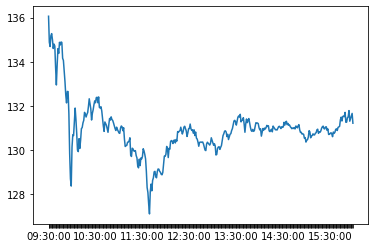

In [5]:
close = pd.Series(df_AAPL_210902.Close.values, index=df_AAPL_210902.Time)

# plot the price chart
fig, ax = plt.subplots (1,1, figsize=(6,4))
ax.plot(close)
ax.set_title("2020-09-02 AAPL.O Close")

spacing = 60
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

plt.show()

In [6]:
returns = close.pct_change().dropna() * 10000

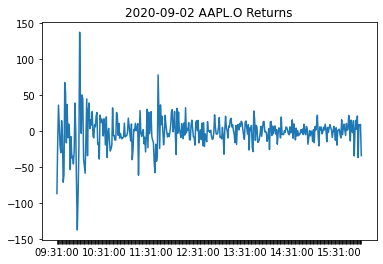

In [7]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(returns)

spacing = 60
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

ax.set_title("2020-09-02 AAPL.O Returns")
plt.show()

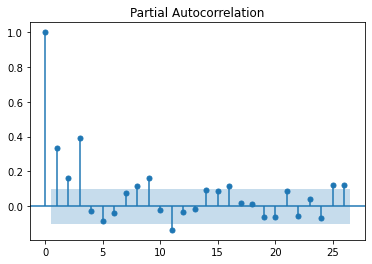

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(returns**2)
plt.show()

In [9]:
# try GARCH(3,3)
model = arch_model(returns, p=3, q=3)
model = model.fit(disp="off")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1628.75
Distribution:                  Normal   AIC:                           3273.51
Method:            Maximum Likelihood   BIC:                           3305.22
                                        No. Observations:                  389
Date:                Sun, Oct 24 2021   Df Residuals:                      388
Time:                        09:32:58   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1316      0.686     -0.192      0.848 [ -1.476,  1.213]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         13.3091      7.788      1.709  8.746e-02   [ -1.955, 28.573]
alpha[1]       0.2127      0.101      2.115  3.439e-02 [1.563e-02,  0.410]
alpha[2]       0.0269      0.136      0.198      0.843   [ -0.239,  0.293]
alpha[3]   1.0294e-14  9.347e-02  1.101e-13      1.000   [ -0.183,  0.183]
beta[1]        0.3356      0.322      1.041      0.298   [ -0.296,  0.968]
beta[2]    3.3926e-14      0.310  1.093e-13      1.000   [ -0.608,  0.608]
beta[3]        0.3763      0.149      2.527  1.149e-02 [8.450e-02,  0.668]
==========================================================================

Covariance estimator: robust
"""

In [10]:
# 2 not significant -> GARCH(1,1)
model = arch_model(returns, p=1, q=1)
model = model.fit(disp="off")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1630.63
Distribution:                  Normal   AIC:                           3269.26
Method:            Maximum Likelihood   BIC:                           3285.12
                                        No. Observations:                  389
Date:                Sun, Oct 24 2021   Df Residuals:                      388
Time:                        09:32:58   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2272      0.648     -0.351      0.726 [ -1.497,  1.042]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          6.9295      4.409      1.572      0.116   [ -1.713, 15.571]
alpha[1]       0.1348  5.457e-02      2.470  1.353e-02 [2.781e-02,  0.242]
beta[1]        0.8415  5.534e-02     15.206  3.239e-52   [  0.733,  0.950]
==========================================================================

Covariance estimator: robust
"""

In [11]:
preds = []
test_minutes = 60
    
for i in range(test_minutes):
    data = returns[:-(test_minutes-i)]
    model = arch_model(data, p=1, q=1)
    model = model.fit(disp='off')
    pred = model.forecast(horizon=1)
    preds.append(np.sqrt(pred.variance.values[-1,:][0]))
    
preds = pd.Series(preds, index=df_AAPL_210902.Time[-test_minutes:])

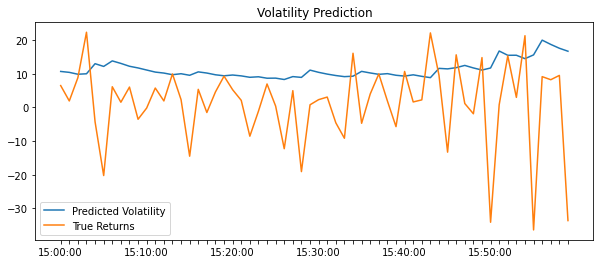

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(preds)
ax.plot(returns[-test_minutes:])
ax.set_title("Volatility Prediction")
ax.legend(['Predicted Volatility', 'True Returns'])

spacing = 10
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

We can see that the predicted volatility increases when the actual change in returns increases

The test minutes variable is set to be 60 minutes for a better plot. We would be using 10 minutes since we will have the data up to 15:50 to predict the volatility of the last 10 minutes

Problems I encountered:
- Not all dates seem to be significant when trained using the GARCH model (p-values > 0.05)

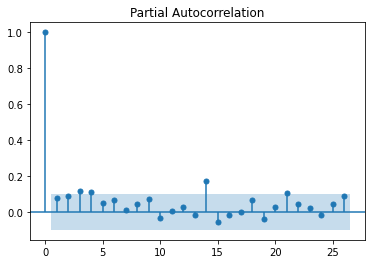

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1700.68
Distribution:                  Normal   AIC:                           3409.35
Method:            Maximum Likelihood   BIC:                           3425.20
                                        No. Observations:                  389
Date:                Sun, Oct 24 2021   Df Residuals:                      388
Time:                        09:33:00   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -1.1689      0.915     -1.278      0.201 [ -2.962,  0.624]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.8562      3.540      1.089      0.276      [ -3.081, 10.794]
alpha[1]       0.0328  2.207e-02      1.488      0.137 [-1.042e-02,7.610e-02]
beta[1]        0.9542  2.785e-02     34.260 3.072e-257      [  0.900,  1.009]
=============================================================================

Covariance estimator: robust
"""

In [13]:
date = df.loc[df.RIC == "AAPL.O"].loc[df.Date == '2020-09-03']
close = pd.Series(date.Close.values, index=date.Time)
returns = close.pct_change().dropna() * 10000

plot_pacf(returns**2)
plt.show()

model = arch_model(returns, p=1, q=1)
model = model.fit(disp="off")
model.summary()

## Predicting Daily Volatility

In [14]:
df.loc[df.RIC == "AAPL.O"]

,Unnamed: 0,BarTime,Date,Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume
0,0,2020-09-01 13:30:00+00:00,2020-09-01,09:30:00,AAPL.O,132.760,132.92,131.490,131.6700,132.656,7032,5143217.0
1,1,2020-09-01 13:31:00+00:00,2020-09-01,09:31:00,AAPL.O,131.710,132.00,131.320,131.6852,131.696,4657,1089138.0
2,2,2020-09-01 13:32:00+00:00,2020-09-01,09:32:00,AAPL.O,131.660,132.00,131.130,131.8100,131.554,4668,1062337.0
3,3,2020-09-01 13:33:00+00:00,2020-09-01,09:33:00,AAPL.O,131.810,131.83,130.810,130.9047,131.158,5074,1147498.0
4,4,2020-09-01 13:34:00+00:00,2020-09-01,09:34:00,AAPL.O,130.910,131.39,130.890,131.3300,131.134,4179,915152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
98307,98307,2021-09-01 19:55:00+00:00,2021-09-01,15:55:00,AAPL.O,152.430,152.46,152.385,152.4400,152.428,2355,487520.0
98308,98308,2021-09-01 19:56:00+00:00,2021-09-01,15:56:00,AAPL.O,152.440,152.47,152.420,152.4400,152.445,2084,356602.0
98309,98309,2021-09-01 19:57:00+00:00,2021-09-01,15:57:00,AAPL.O,152.450,152.47,152.400,152.4600,152.438,1869,339385.0
98310,98310,2021-09-01 19:58:00+00:00,2021-09-01,15:58:00,AAPL.O,152.460,152.50,152.430,152.4801,152.461,2263,512189.0


In [15]:
df.groupby(by='RIC').count()

,Unnamed: 0,BarTime,Date,Time,Open,High,Low,Close,VWAP,NumberOfTrades,Volume
RIC,,,,,,,,,,,
AAPL.O,98312,98312,98312,98312,98312,98312,98312,98312,98312,98312,98312
ADBE.O,97469,97469,97469,97469,97469,97469,97469,97469,97469,97469,97469
ADI.O,98076,98076,98076,98076,98076,98076,98076,98076,98076,98076,98076
ADP.O,96649,96649,96649,96649,96649,96649,96649,96649,96649,96649,96649
ADSK.O,94545,94545,94545,94545,94545,94545,94545,94545,94545,94545,94545
...,...,...,...,...,...,...,...,...,...,...,...
WBA.O,98286,98286,98286,98286,98286,98286,98286,98286,98286,98286,98286
WDAY.O,95658,95658,95658,95658,95658,95658,95658,95658,95658,95658,95658
XEL.O,98019,98019,98019,98019,98019,98019,98019,98019,98019,98019,98019


In [16]:
#select only the last closing prices of the days
df_last = df.loc[df.RIC == "AAPL.O"].groupby(df.Date).apply(lambda x: x.iloc[[-1]])
df_last.index = df_last.index.droplevel(0)

In [17]:
df_last

,Unnamed: 0,BarTime,Date,Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume
389,389,2020-09-01 19:59:00+00:00,2020-09-01,15:59:00,AAPL.O,134.440,134.54,134.14,134.19,134.458,6566,2021577.0
779,779,2020-09-02 19:59:00+00:00,2020-09-02,15:59:00,AAPL.O,131.670,131.79,131.18,131.22,131.592,6819,1295126.0
1169,1169,2020-09-03 19:59:00+00:00,2020-09-03,15:59:00,AAPL.O,120.960,121.22,120.81,120.92,120.939,12615,3197329.0
1559,1559,2020-09-04 19:59:00+00:00,2020-09-04,15:59:00,AAPL.O,121.120,121.45,120.87,120.90,121.093,8471,2050307.0
1949,1949,2020-09-08 19:59:00+00:00,2020-09-08,15:59:00,AAPL.O,112.890,113.04,112.68,112.83,112.808,10066,2671551.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96751,96751,2021-08-26 19:59:00+00:00,2021-08-26,15:59:00,AAPL.O,147.565,147.59,147.52,147.54,147.549,1770,357817.0
97141,97141,2021-08-27 19:59:00+00:00,2021-08-27,15:59:00,AAPL.O,148.605,148.67,148.50,148.60,148.623,2642,673180.0
97531,97531,2021-08-30 19:59:00+00:00,2021-08-30,15:59:00,AAPL.O,153.105,153.20,153.02,153.10,153.126,3204,744488.0
97921,97921,2021-08-31 19:59:00+00:00,2021-08-31,15:59:00,AAPL.O,151.860,151.96,151.69,151.83,151.789,6551,1467824.0


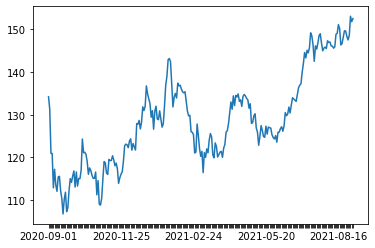

In [18]:
close = pd.Series(df_last.Close.values, index=df_last.Date)

# plot the price chart
fig, ax = plt.subplots (1,1, figsize=(6,4))
ax.plot(close)

spacing = 60
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

plt.show()

In [19]:
returns = close.pct_change().dropna() * 100

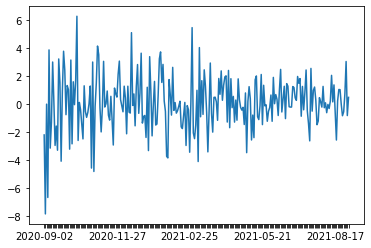

In [20]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(returns)

spacing = 60
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

plt.show()

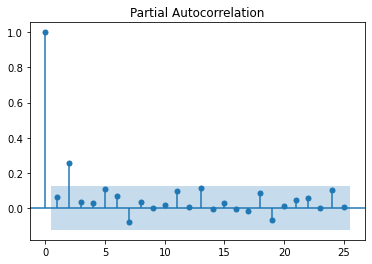

In [21]:
plot_pacf(returns**2)
plt.show()

In [22]:
# try GARCH(3,3)
model = arch_model(returns, p=2, q=2)
model = model.fit(disp="off")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -501.695
Distribution:                  Normal   AIC:                           1015.39
Method:            Maximum Likelihood   BIC:                           1036.57
                                        No. Observations:                  252
Date:                Sun, Oct 24 2021   Df Residuals:                      251
Time:                        09:33:06   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1473      0.105      1.404      0.160 [-5.834e-02,  0.353]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0175  2.273e-02      0.771      0.441 [-2.703e-02,6.208e-02]
alpha[1]       0.0000  1.906e-02      0.000      1.000 [-3.735e-02,3.735e-02]
alpha[2]   2.5193e-03  1.786e-02      0.141      0.888 [-3.248e-02,3.752e-02]
beta[1]        0.0000  2.188e-02      0.000      1.000 [-4.288e-02,4.288e-02]
beta[2]        0.9735  1.423e-02     68.422      0.000      [  0.946,  1.001]
=============================================================================

Covariance estimator: robust
"""

### Using 2-year data instead of 1-year data

In [23]:
import pandas_datareader.data as web
from datetime import datetime, timedelta


Text(0.5, 1.0, '2019-2021 AAPL.O Close')

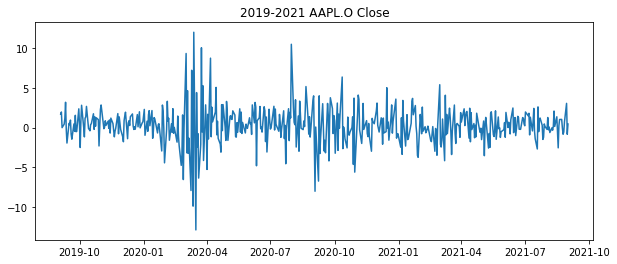

In [30]:
start = datetime(2019, 9, 1)
end = datetime(2021, 9, 1)

dis = web.DataReader('AAPL', 'yahoo', start=start, end=end)
returns = 100 * dis.Close.pct_change().dropna()

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title("2019-2021 AAPL.O Close")

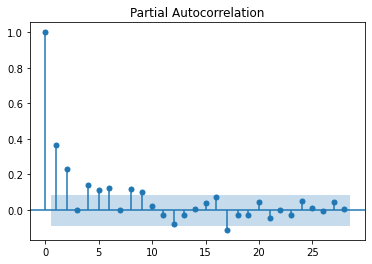

In [25]:
plot_pacf(returns**2)
plt.show()

In [26]:
model = arch_model(returns, p=2, q=2)
model = model.fit(disp="off")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1043.71
Distribution:                  Normal   AIC:                           2099.41
Method:            Maximum Likelihood   BIC:                           2124.75
                                        No. Observations:                  504
Date:                Sun, Oct 24 2021   Df Residuals:                      503
Time:                        09:33:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3339  7.297e-02      4.575  4.760e-06 [  0.191,  0.477]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2339      0.107      2.191  2.843e-02    [2.468e-02,  0.443]
alpha[1]       0.0284  3.511e-02      0.810      0.418 [-4.038e-02,9.727e-02]
alpha[2]       0.2605  7.743e-02      3.365  7.659e-04      [  0.109,  0.412]
beta[1]        0.1565      0.119      1.315      0.189   [-7.676e-02,  0.390]
beta[2]        0.5251      0.110      4.778  1.766e-06      [  0.310,  0.740]
=============================================================================

Covariance estimator: robust
"""

In [27]:
model = arch_model(returns, p=1, q=1)
model = model.fit(disp="off")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1049.53
Distribution:                  Normal   AIC:                           2107.05
Method:            Maximum Likelihood   BIC:                           2123.94
                                        No. Observations:                  504
Date:                Sun, Oct 24 2021   Df Residuals:                      503
Time:                        09:33:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3260  7.384e-02      4.415  1.011e-05 [  0.181,  0.471]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1582  6.881e-02      2.299  2.152e-02 [2.331e-02,  0.293]
alpha[1]       0.1573  4.178e-02      3.764  1.671e-04 [7.539e-02,  0.239]
beta[1]        0.8172  3.737e-02     21.866 5.488e-106   [  0.744,  0.890]
==========================================================================

Covariance estimator: robust
"""

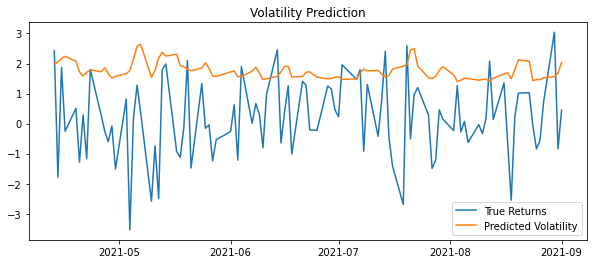

In [28]:
rolling_predictions = []
test_size = 100

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-100:])

plt.figure(figsize=(10,4))
true, = plt.plot(returns[-100:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction')
plt.legend(['True Returns', 'Predicted Volatility'])